In [2]:
#install normative modeling
! pip3 uninstall -y Theano-PyMC  # conflicts with Theano on some environments
! pip3 install pcntoolkit==0.20 

Defaulting to user installation because normal site-packages is not writeable
  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)

[notice] A new release of pip available: 22.1.2 -> 22.2.1
[notice] To update, run: /Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip


In [3]:
import pandas as pd
pd.set_option('display.max_columns', 1000)  

In [4]:
import os
os.chdir('/Users/jobayer/Documents/GitHub/normative_twins_project/data')


In [5]:
os.getcwd()
#demo = 
pd.read_csv('participants.tsv', sep='\t')

,participant_id,family_id,sex,age,age_ses02,handedness,ses01_T1w_acq,ses02_T1w_acq,nback_seq,group
0,sub-0001,fam-0225,M,22,NaN,right,1,NaN,1.0,NaN
1,sub-0002,fam-0222,M,20,20.0,right,1,1.0,1.0,1.0
2,sub-0003,fam-0393,M,19,NaN,right,2,NaN,1.0,NaN
3,sub-0004,fam-0162,M,28,NaN,right,1,NaN,1.0,NaN
4,sub-0005,fam-0662,M,21,NaN,right,1,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...
1197,sub-1290,fam-0474,F,12,NaN,right,1,NaN,1.0,NaN
1198,sub-1293,fam-0487,F,16,NaN,right,1,NaN,1.0,NaN
1199,sub-1294,fam-0480,M,12,NaN,right,1,NaN,2.0,NaN
1200,sub-1295,fam-0494,F,12,15.0,right,1,1.0,2.0,2.0


In [6]:
# Load the data

ses_1 = pd.read_csv('derivatives_freesurfer_5.3_fs5.3_ses-01.tsv', sep='\t')
ses_2 = pd.read_csv('derivatives_freesurfer_5.3_fs5.3_ses-02.tsv', sep='\t')
ses_1_sub = pd.read_csv('derivatives_freesurfer_5.3_fs5.3_subfields6_ses-01.tsv', sep='\t')
ses_2_sub = pd.read_csv('derivatives_freesurfer_5.3_fs5.3_subfields6_ses-02.tsv', sep='\t')
demo =  pd.read_csv('participants.tsv', sep='\t')

In [7]:
demo["sex"].replace({"M": 0, "F": 1}, inplace=True)
print(demo)

     participant_id family_id  sex  age  age_ses02 handedness  ses01_T1w_acq  \
0          sub-0001  fam-0225    0   22        NaN      right              1   
1          sub-0002  fam-0222    0   20       20.0      right              1   
2          sub-0003  fam-0393    0   19        NaN      right              2   
3          sub-0004  fam-0162    0   28        NaN      right              1   
4          sub-0005  fam-0662    0   21        NaN      right              1   
...             ...       ...  ...  ...        ...        ...            ...   
1197       sub-1290  fam-0474    1   12        NaN      right              1   
1198       sub-1293  fam-0487    1   16        NaN      right              1   
1199       sub-1294  fam-0480    0   12        NaN      right              1   
1200       sub-1295  fam-0494    1   12       15.0      right              1   
1201       sub-1296  fam-0689    1   12        NaN      right              1   

      ses02_T1w_acq  nback_seq  group  

In [8]:
norm_demo_features = pd.concat([ses_1, demo],
                                       axis = 1,
                                       join = 'inner')
#print(norm_demographics_features)
norm_demo_features

,participant_id,X3rd_Ventricle,X4th_Ventricle,X5th_Ventricle,Brain_Stem,BrainSeg,BrainSegVol,BrainSegVol_to_eTIV,BrainSegVolNotVent,BrainSegVolNotVentSurf,CC_Anterior,CC_Central,CC_Mid_Anterior,CC_Mid_Posterior,CC_Posterior,CortexVol,CorticalWhiteMatterVol,CSF,EstimatedTotalIntraCranialVol,Laccumb,Lamyg,Lcaud,Left_Cerebellum_Cortex,Left_Cerebellum_White_Matter,Left_choroid_plexus,Left_Inf_Lat_Vent,Left_Lateral_Ventricle,Left_non_WM_hypointensities,Left_VentralDC,Left_vessel,Left_WM_hypointensities,lhCortexVol,lhCorticalWhiteMatterVol,Lhippo,lhSurfaceHoles,Lpal,Lput,LSurfArea,Lthal,LThickness,MaskVol,MaskVol_to_eTIV,non_WM_hypointensities,Optic_Chiasm,Raccumb,Ramyg,Rcaud,rhCortexVol,rhCorticalWhiteMatterVol,Rhippo,rhSurfaceHoles,Right_Cerebellum_Cortex,Right_Cerebellum_White_Matter,Right_choroid_plexus,Right_Inf_Lat_Vent,Right_Lateral_Ventricle,Right_non_WM_hypointensities,Right_VentralDC,Right_vessel,Right_WM_hypointensities,Rpal,Rput,RSurfArea,Rthal,RThickness,SubCortGrayVol,SupraTentorialVol,SupraTentorialVolNotVent,SupraTentorialVolNotVentVox,SurfaceHoles,TotalGrayVol,WM_hypointensities,L_bankssts_surfarea,L_bankssts_thickavg,L_caudalanteriorcingulate_surfarea,L_caudalanteriorcingulate_thickavg,L_caudalmiddlefrontal_surfarea,L_caudalmiddlefrontal_thickavg,L_cuneus_surfarea,L_cuneus_thickavg,L_entorhinal_surfarea,L_entorhinal_thickavg,L_frontalpole_surfarea,L_frontalpole_thickavg,L_fusiform_surfarea,L_fusiform_thickavg,L_inferiorparietal_surfarea,L_inferiorparietal_thickavg,L_inferiortemporal_surfarea,L_inferiortemporal_thickavg,L_insula_surfarea,L_insula_thickavg,L_isthmuscingulate_surfarea,L_isthmuscingulate_thickavg,L_lateraloccipital_surfarea,L_lateraloccipital_thickavg,L_lateralorbitofrontal_surfarea,L_lateralorbitofrontal_thickavg,L_lingual_surfarea,L_lingual_thickavg,L_medialorbitofrontal_surfarea,L_medialorbitofrontal_thickavg,L_middletemporal_surfarea,L_middletemporal_thickavg,L_paracentral_surfarea,L_paracentral_thickavg,L_parahippocampal_surfarea,L_parahippocampal_thickavg,L_parsopercularis_surfarea,L_parsopercularis_thickavg,L_parsorbitalis_surfarea,L_parsorbitalis_thickavg,L_parstriangularis_surfarea,L_parstriangularis_thickavg,L_pericalcarine_surfarea,L_pericalcarine_thickavg,L_postcentral_surfarea,L_postcentral_thickavg,L_posteriorcingulate_surfarea,L_posteriorcingulate_thickavg,L_precentral_surfarea,L_precentral_thickavg,L_precuneus_surfarea,L_precuneus_thickavg,L_rostralanteriorcingulate_surfarea,L_rostralanteriorcingulate_thickavg,L_rostralmiddlefrontal_surfarea,L_rostralmiddlefrontal_thickavg,L_superiorfrontal_surfarea,L_superiorfrontal_thickavg,L_superiorparietal_surfarea,L_superiorparietal_thickavg,L_superiortemporal_surfarea,L_superiortemporal_thickavg,L_supramarginal_surfarea,L_supramarginal_thickavg,L_temporalpole_surfarea,L_temporalpole_thickavg,L_transversetemporal_surfarea,L_transversetemporal_thickavg,R_bankssts_surfarea,R_bankssts_thickavg,R_caudalanteriorcingulate_surfarea,R_caudalanteriorcingulate_thickavg,R_caudalmiddlefrontal_surfarea,R_caudalmiddlefrontal_thickavg,R_cuneus_surfarea,R_cuneus_thickavg,R_entorhinal_surfarea,R_entorhinal_thickavg,R_frontalpole_surfarea,R_frontalpole_thickavg,R_fusiform_surfarea,R_fusiform_thickavg,R_inferiorparietal_surfarea,R_inferiorparietal_thickavg,R_inferiortemporal_surfarea,R_inferiortemporal_thickavg,R_insula_surfarea,R_insula_thickavg,R_isthmuscingulate_surfarea,R_isthmuscingulate_thickavg,R_lateraloccipital_surfarea,R_lateraloccipital_thickavg,R_lateralorbitofrontal_surfarea,R_lateralorbitofrontal_thickavg,R_lingual_surfarea,R_lingual_thickavg,R_medialorbitofrontal_surfarea,R_medialorbitofrontal_thickavg,R_middletemporal_surfarea,R_middletemporal_thickavg,R_paracentral_surfarea,R_paracentral_thickavg,R_parahippocampal_surfarea,R_parahippocampal_thickavg,R_parsopercularis_surfarea,R_parsopercularis_thickavg,R_parsorbitalis_surfarea,R_parsorbitalis_thickavg,R_parstriangularis_surfarea,R_parstriangularis_thickavg,R_pericalcarine_surfarea,R_pericalcarine_th

In [9]:
covariate_normsample = norm_demo_features[['sex','age']] 

covariate_normsample.to_csv('covariate_normsample.txt',
                            sep = ' ',
                            header = False, 
                            index = False)

# perpare features_normsample for relevant hyppocampal subfields
features_normsample = norm_demo_features[['R_insula_thickavg']]

features_normsample.to_csv('features_normsample.txt', 
                           sep = ' ', 
                           header = False, 
                           index = False)


In [10]:
feat = features_normsample.dropna()

feat.to_csv('feat.txt', 
            sep = ' ', 
            header = False, 
            index = False)

print(feat.shape)

cov = covariate_normsample[features_normsample['R_insula_thickavg'].notna()]
print(cov.shape)

cov.to_csv('cov.txt', 
            sep = ' ', 
            header = False, 
            index = False)


(1075, 1)
(1075, 2)


In [11]:
import pcntoolkit as pcn

# run normative modeling using 2-fold cross-validation

pcn.normative.estimate(covfile = 'cov.txt', 
                       respfile = 'feat.txt',
                       cvfolds = 2,
                       alg = 'gpr',
                       outputsuffix = '_2fold')


Processing data in feat.txt
Estimating model  1 of 1
Optimization terminated successfully.
         Current function value: -150.199266
         Iterations: 90
         Function evaluations: 222
         Gradient evaluations: 222
Estimating model  1 of 1
Optimization terminated successfully.
         Current function value: -94.623885
         Iterations: 85
         Function evaluations: 258
         Gradient evaluations: 251
Evaluating the model ...
Writing outputs ...


In [18]:
# create covariate_forwardmodel.txt file
covariate_forwardmodel = {'sex': [0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0,0, 0, 0, 
                                  1, 1, 1, 1, 1, 1, 1,1, 1, 1, 1, 1, 1, 1,1, 1, 1, 1,1, 1, 1 ],
                          'age': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,
                                  10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}
covariate_forwardmodel = pd.DataFrame(data=covariate_forwardmodel)

covariate_forwardmodel.to_csv('covariate_forwardmodel.txt', 
                           sep = ' ', 
                           header = False, 
                           index = False)

# estimate forward model
pcn.normative.estimate(covfile = 'cov.txt', 
                       respfile = 'feat.txt',
                       testcov = 'covariate_forwardmodel.txt',
                       cvfolds = None,
                       alg = 'gpr',
                       outputsuffix = '_forward')

Processing data in feat.txt
Estimating model  1 of 1
         Current function value: -256.767234
         Iterations: 100
         Function evaluations: 263
         Gradient evaluations: 263
Writing outputs ...


/Users/jobayer/Library/Python/3.8/lib/python/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


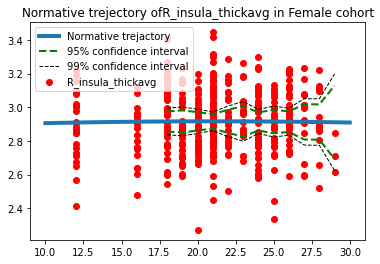

/Users/jobayer/Library/Python/3.8/lib/python/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


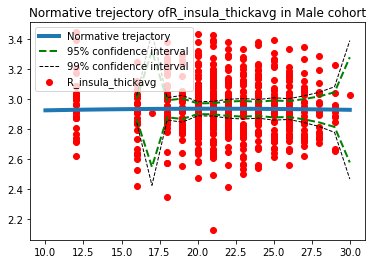

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# confidence interval calculation at x_forward
def confidence_interval(s2,x,z):
  CI=np.zeros((len(x_forward),4))
  for i,xdot in enumerate(x_forward):
    ci_inx=np.isin(x,xdot)
    S2=s2[ci_inx]
    S_hat=np.mean(S2,axis=0)
    n=S2.shape[0]
    CI[i,:]=z*np.power(S_hat/n,.5)
  return CI 


feature_names=['R_insula_thickavg']
sex_covariates=[ 'Female','Male']
# Creating plots for Female and male 
for i,sex in enumerate(sex_covariates):
#forward model data
    forward_yhat = pd.read_csv('yhat_forward.txt', sep = ' ', header=None)
    yhat_forward=forward_yhat.values
    yhat_forward=yhat_forward[21*i:21*(i+1)]
    x_forward=[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]

# Find the index of the data exclusively for one sex. Female:0, Male: 1   
    inx=np.where(cov.sex==i)[0]
    x=cov.values[inx,1]
# actual data
    y = pd.read_csv('feat.txt', sep = ' ', header=None)
    y=y.values[inx]
# confidence Interval yhat+ z *(std/n^.5)-->.95 % CI:z=1.96, 99% CI:z=2.58 
    s2= pd.read_csv('ys2_2fold.txt', sep = ' ', header=None)
    s2=s2.values[inx]

    CI_95=confidence_interval(s2,x,1.96)
    CI_99=confidence_interval(s2,x,2.58)

# Creat a trejactroy for each point     
    for j,name in enumerate(feature_names):
         fig=plt.figure()
         ax=fig.add_subplot(111)
         ax.plot(x_forward,yhat_forward[:,j], linewidth=4, label='Normative trejactory')


         ax.plot(x_forward,CI_95[:,j]+yhat_forward[:,j], linewidth=2,linestyle='--',c='g', label='95% confidence interval')  
         ax.plot(x_forward,-CI_95[:,j]+yhat_forward[:,j], linewidth=2,linestyle='--',c='g') 

         ax.plot(x_forward,CI_99[:,j]+yhat_forward[:,j], linewidth=1,linestyle='--',c='k', label='99% confidence interval')  
         ax.plot(x_forward,-CI_99[:,j]+yhat_forward[:,j], linewidth=1,linestyle='--',c='k') 

         ax.scatter(x,y[:,j],c='r', label=name)
         plt.legend(loc='upper left')
         plt.title('Normative trajectory of ' +name+' in '+sex+' cohort')
         plt.show()
         plt.close()
        
# code by M. Zabihi